In [1]:
! wget https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam.csv

--2025-04-25 14:13:30--  https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248354 (243K) [text/plain]
Saving to: ‘indo_spam.csv’

indo_spam.csv       100%[===================>] 242.53K  --.-KB/s    in 0.04s   

2025-04-25 14:13:30 (6.29 MB/s) - ‘indo_spam.csv’ saved [248354/248354]



In [2]:
! pip install -U accelerate
! pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.3 MB/s eta 0:00:00


In [5]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from evaluate import load

metric = load("accuracy")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
# load data
df = pd.read_csv('indo_spam.csv')
df.head()

,Kategori,Pesan
0,Spam,(Bank Granit menerbitkan Strong-Buy) PILIHAN E...
1,ham,(Saya harus menambahkan bahwa saya tidak terla...
2,ham,"(Yang mengatakan, bisakah Anda mengirim sms ke..."
3,Spam,* GRATIS * POLIFONIK RINGTONE Teks SUPER ke 87...
4,Spam,**PESAN GRATIS**Terima kasih telah menggunakan...


In [7]:
df['label'] = df['Kategori'].apply(lambda x:0 if x=="ham" else 1)

In [8]:
df = df.drop(columns=['Kategori'])
df.rename(columns={"Pesan": "Teks"}, inplace=True)
df

,Teks,label
0,(Bank Granit menerbitkan Strong-Buy) PILIHAN E...,1
1,(Saya harus menambahkan bahwa saya tidak terla...,0
2,"(Yang mengatakan, bisakah Anda mengirim sms ke...",0
3,* GRATIS * POLIFONIK RINGTONE Teks SUPER ke 87...,1
4,**PESAN GRATIS**Terima kasih telah menggunakan...,1
...,...,...
2040,"Yup, tidak perlu. Aku akan jus menunggu 4 e hu...",0
2041,Yup... Dari apa yang saya remb... Saya pikir s...,0
2042,Yup... Bagaimana Ã 1/4 noe leh ...,0
2043,Yup... Ok i go home melihat timing maka saya m...,0


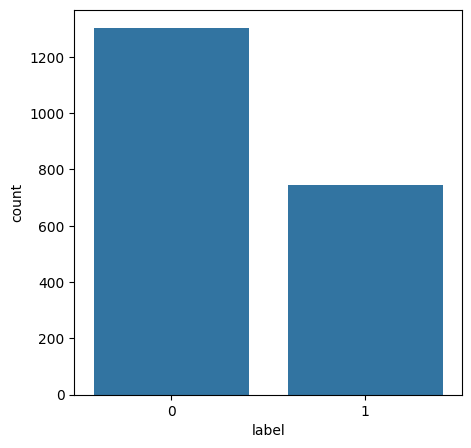

In [9]:
# check count and unique and top values and their frequency
plt.figure(figsize=(5, 5))
sns.countplot(x=df['label'])
plt.show()

In [10]:
df['label'].value_counts()

,count
label,
0,1302
1,743


In [11]:
df.sample(10)

,Teks,label
1017,Lol Anda selalu begitu meyakinkan.,0
1658,saldo tunai HMV Quiz Anda saat ini Â £ 500 - u...,1
1047,"Selamat Natal untukmu juga sayang, i love ya *...",0
1625,U tidur sekarang.. Atau Anda akan mengambil? H...,0
1005,WAKAKAK... Sudahkah Anda membuat rencana untuk...,0
573,"Haha cuma bercanda, papa butuh narkoba",0
93,Juga apakah Anda membawa galileo atau dobby,0
116,Ard 515 seperti dat. Y?,0
1907,Ya saya akan berada di sana. Senang Anda berha...,0
18,1000 anak perempuan banyak lokal 2 u yang r pe...,1


In [12]:
df['Teks']=df['Teks'].str.lower()
df

,Teks,label
0,(bank granit menerbitkan strong-buy) pilihan e...,1
1,(saya harus menambahkan bahwa saya tidak terla...,0
2,"(yang mengatakan, bisakah anda mengirim sms ke...",0
3,* gratis * polifonik ringtone teks super ke 87...,1
4,**pesan gratis**terima kasih telah menggunakan...,1
...,...,...
2040,"yup, tidak perlu. aku akan jus menunggu 4 e hu...",0
2041,yup... dari apa yang saya remb... saya pikir s...,0
2042,yup... bagaimana ã 1/4 noe leh ...,0
2043,yup... ok i go home melihat timing maka saya m...,0


In [13]:
import re

In [14]:
def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [15]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,bank granit menerbitkan strong buy pilihan eks...,1
1,saya harus menambahkan bahwa saya tidak terlal...,0
2,yang mengatakan bisakah anda mengirim sms kepa...,0
3,gratis polifonik ringtone teks super ke untuk ...,1
4,pesan gratis terima kasih telah menggunakan la...,1
...,...,...
2040,yup tidak perlu aku akan jus menunggu e hujan ...,0
2041,yup dari apa yang saya remb saya pikir seharus...,0
2042,yup bagaimana noe leh,0
2043,yup ok i go home melihat timing maka saya msg ...,0


In [16]:
def cleaning_text(text):
  return text.translate(str.maketrans("","",string.punctuation))
  return text.strip()
  return re.sub('\s+',' ',text)
  return re.sub(r"\b[a-zA-Z]\b", "", text)

In [17]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,bank granit menerbitkan strong buy pilihan eks...,1
1,saya harus menambahkan bahwa saya tidak terlal...,0
2,yang mengatakan bisakah anda mengirim sms kepa...,0
3,gratis polifonik ringtone teks super ke untuk ...,1
4,pesan gratis terima kasih telah menggunakan la...,1
...,...,...
2040,yup tidak perlu aku akan jus menunggu e hujan ...,0
2041,yup dari apa yang saya remb saya pikir seharus...,0
2042,yup bagaimana noe leh,0
2043,yup ok i go home melihat timing maka saya msg ...,0


In [18]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

In [19]:
df['Teks']=df['Teks'].apply(remove_tweet_special)
df

,Teks,label
0,bank granit menerbitkan strong buy pilihan eks...,1
1,saya harus menambahkan bahwa saya tidak terlal...,0
2,yang mengatakan bisakah anda mengirim sms kepa...,0
3,gratis polifonik ringtone teks super ke untuk ...,1
4,pesan gratis terima kasih telah menggunakan la...,1
...,...,...
2040,yup tidak perlu aku akan jus menunggu e hujan ...,0
2041,yup dari apa yang saya remb saya pikir seharus...,0
2042,yup bagaimana noe leh,0
2043,yup ok i go home melihat timing maka saya msg ...,0


In [20]:
RANDOM_SEED = 42

df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.4,
    random_state=RANDOM_SEED,
)

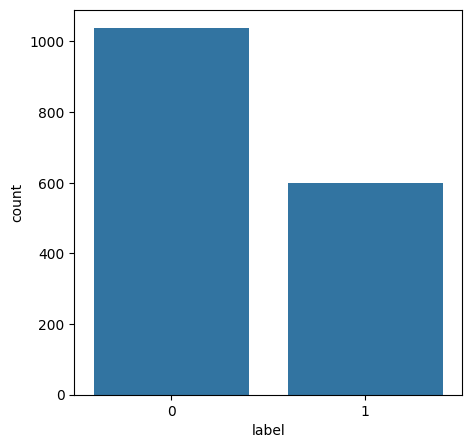

In [21]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

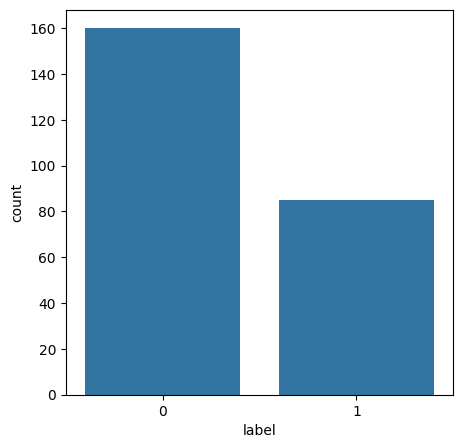

In [22]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

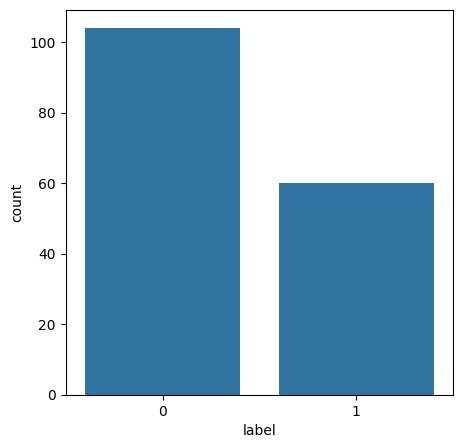

In [23]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [24]:
print(f'Total Train: {len(df_train)}')
print(f'Total Val  : {len(df_val)}')
print(f'Total Test : {len(df_test)}')

Total Train: 1636
Total Val  : 245
Total Test : 164


In [25]:
df_train.to_csv("train.csv", index=False)
df_val.to_csv("eval.csv", index=False)
df_test.to_csv("test.csv", index=False)

In [26]:
from datasets import load_dataset

files = {
    "train": "train.csv",
    "eval": "eval.csv",
    "test": "test.csv",
}

dataset = load_dataset('csv', data_files=files)

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [27]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [28]:
def tokenize_function(text):
    return tokenizer(text["Teks"], padding='max_length', max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1636 [00:00<?, ? examples/s]

Map:   0%|          | 0/245 [00:00<?, ? examples/s]

Map:   0%|          | 0/164 [00:00<?, ? examples/s]

In [29]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

In [30]:
import torch
torch.cuda.empty_cache()

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [31]:
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
from transformers import TrainingArguments
from torch import clamp

training_args = TrainingArguments(
    "test_trainer",
    per_device_train_batch_size=4,
)

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [33]:
from evaluate import load as load_metric
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return metric.compute(predictions=predictions, references=labels)

torch.cuda.empty_cache()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

training_history = trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: banigaming8 (banigaming8-binus-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.215100
1000,0.063100


In [34]:
evaluation_history = trainer.evaluate()
evaluation_history

{'eval_loss': 0.20105993747711182,
 'eval_accuracy': 0.9673469387755103,
 'eval_runtime': 3.5603,
 'eval_samples_per_second': 68.814,
 'eval_steps_per_second': 8.707,
 'epoch': 3.0}

In [35]:
test_dataset = tokenized_datasets["test"]

prediction = trainer.predict(test_dataset)
prediction = prediction.predictions.argmax(1)

In [36]:
actual_label = df_test['label']

In [37]:
print(classification_report(prediction, actual_label, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       101
           1       0.98      0.94      0.96        63

    accuracy                           0.97       164
   macro avg       0.97      0.96      0.97       164
weighted avg       0.97      0.97      0.97       164



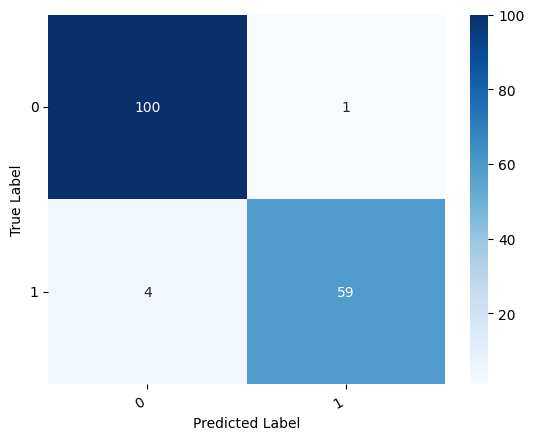

In [38]:
def show_confusion_matrix(confusion_matrix):
        hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
        hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
        hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

cm = confusion_matrix(prediction, actual_label)
show_confusion_matrix(cm)

In [39]:
model.save_pretrained("model")

In [40]:
model = AutoModelForSequenceClassification.from_pretrained("model")

In [41]:
trainer = Trainer(model=model)

In [42]:
def predict(text):
    tokenized = tokenizer(text, padding='max_length', max_length=256)
    label = trainer.predict([tokenized]).predictions.argmax(1)[0]
    if label == 0:
        print(f'Predicted: Ham [{label}]')
    else:
        print(f'Predicted: Spam [{label}]')

In [43]:
predict("""
    Selamat!! anda Mendpt hadiah Rp. 75 juta. Dari TELKOMSEL point "Edisi september" Hub kntr pusat
""")

Predicted: Spam [1]


In [44]:
predict("""
    Assalamualaikum Pak. Ini dg nama1 ilkom 2012. Maaf Pak td saya ninggalin proposal di meja Bapak di atas printer. Terima kasih Pak.
""")

Predicted: Ham [0]
